# <font color='red'>**Sequence to sequence implementation**</font>

**There will be some functions that start with the word "grader" ex: grader_check_encoder(), grader_check_attention(), grader_onestepdecoder() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

1. Download the **Italian** to **English** translation dataset from <a href="http://www.manythings.org/anki/ita-eng.zip">here</a>

2. You will find **ita.txt** file in that ZIP, 
you can read that data using python and preprocess that data. 

3. You have to implement an Encoder and Decoder architecture with  
attention as discussed in the reference notebook.

    * Encoder   - with 1 layer LSTM <br>
    * Decoder   - with 1 layer LSTM<br>
    * attention -  (Please refer the <a href= 'https://drive.google.com/file/d/1z_bnc-3aubKawbR6q8wyI6Mh5ho2R1aZ/view?usp=sharing'>**reference notebook**</a> to know more about the attention mechanism.)
4. In Global attention, we have 3 types of scoring functions(as discussed in the reference notebook).
 As a part of this assignment **you need to create 3 models for each scoring function**
<img src='https://i.imgur.com/iD2jZo3.png'>

    * In model 1 you need to implemnt "dot" score function
    * In model 2 you need to implemnt "general" score function
    * In model 3 you need to implemnt "concat" score function.<br>
    
 **Please do add the markdown titles for each model so that we can have a better look at the code and verify.**

5. Using attention weights, you can plot the attention plots, 
please plot those for 2-3 examples. You can check about those in <a href="https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate">this</a>

6. The attention layer has to be written by yourself only. 
The main objective of this assignment is to read and implement a paper on yourself so please do it yourself.  

7. Please implement the class **onestepdecoder** as mentioned in the assignment instructions.

8. You can use any tf.Keras highlevel API's to build and train the models. 
 Check the reference notebook for better understanding.

9. Use BLEU score as metric to evaluate your model. You can use any loss function you need.

10. You have to use Tensorboard to plot the Graph, Scores and histograms of gradients. 

11. Resources:
    a. Check the reference notebook
    b. <a href="https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/">Resource 1</a>
    c. <a href="https://www.tensorflow.org/tutorials/text/nmt_with_attention">Resource 2</a>
    d. <a href="https://stackoverflow.com/questions/44238154/what-is-the-difference-between-luong-attention-and-bahdanau-attention#:~:text=Luong%20attention%20used%20top%20hidden,hidden%20state%20at%20time%20t.">Resource 3</a>
    

**Note 1:**  There are many blogs on the attention mechanisum which might be misleading you,
 so do read the references completly and after that only please check the internet.
 The best things is to read the research papers and try to implement it on your own. 

**Note 2:** To complete this assignment, the reference that are mentioned will be enough.

**Note 3:** If you are starting this assignment, you might have completed minimum of 20 assignment.
 If  you are still not able to implement this algorithm you might have rushed in the previous assignments 
with out learning much and didn't spend your time productively.

# Load data

In [1]:
!wget --header="Host: www.manythings.org" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://colab.research.google.com/" --header="Cookie: __cfduid=df22880bb4f55c8fa346f3877f536184c1593838215" --header="Connection: keep-alive" "http://www.manythings.org/anki/ita-eng.zip" -c -O 'ita-eng.zip'

--2020-07-09 03:24:53--  http://www.manythings.org/anki/ita-eng.zip
Resolving www.manythings.org (www.manythings.org)... 172.67.173.198, 104.24.109.196, 104.24.108.196, ...
Connecting to www.manythings.org (www.manythings.org)|172.67.173.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7441562 (7.1M) [application/zip]
Saving to: ‘ita-eng.zip’

ita-eng.zip         100%[===================>]   7.10M  3.25MB/s    in 2.2s    

2020-07-09 03:24:55 (3.25 MB/s) - ‘ita-eng.zip’ saved [7441562/7441562]



In [2]:
!unzip ita-eng.zip

Archive:  ita-eng.zip
  inflating: ita.txt                 
  inflating: _about.txt              


In [3]:
import os
path_to_file = 'ita.txt'

Looking at dataset

In [4]:
data = open("ita.txt", "r") 

In [5]:
data = data.readlines()

In [6]:
data[:5]

['Hi.\tCiao!\tCC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #607364 (Cero)\n',
 'Run!\tCorri!\tCC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906347 (Guybrush88)\n',
 'Run!\tCorra!\tCC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906348 (Guybrush88)\n',
 'Run!\tCorrete!\tCC-BY 2.0 (France) Attribution: tatoeba.org #906328 (papabear) & #906350 (Guybrush88)\n',
 'Who?\tChi?\tCC-BY 2.0 (France) Attribution: tatoeba.org #2083030 (CK) & #2126402 (Guybrush88)\n']

Using pandas since the values seem to be seperated by tab space

In [7]:
import pandas as pd
df = pd.read_csv('ita.txt',sep = '\t', header = None)

In [8]:
df.head()

,0,1,2
0,Hi.,Ciao!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
1,Run!,Corri!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
2,Run!,Corra!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3,Run!,Correte!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
4,Who?,Chi?,CC-BY 2.0 (France) Attribution: tatoeba.org #2...


In [9]:
df = df.drop(2,axis=1)

In [10]:
df.head()

,0,1
0,Hi.,Ciao!
1,Run!,Corri!
2,Run!,Corra!
3,Run!,Correte!
4,Who?,Chi?


# Preprocess data

Codes taken from https://www.tensorflow.org/tutorials/text/nmt_with_attention with minor changes

In [11]:
from tqdm import tqdm

In [12]:
# Converts the unicode file to ascii
import unicodedata
import re
def unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
  w = unicode_to_ascii(w.lower().strip())

  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  w = re.sub(r"([?.!,¿])", r" \1 ", w)
  w = re.sub(r'[" "]+', " ", w)

  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)

  w = w.strip()

  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  w = '<start> ' + w + ' <end>'
  return w

In [13]:
def create_dataset(data):

  eng_ = [preprocess_sentence(w) for w in tqdm(data[0])]
  ita_ = [preprocess_sentence(w) for w in tqdm(data[1])]

  return eng_, ita_

In [14]:
import io
eng, ita = create_dataset(df)

100%|██████████| 340432/340432 [00:07<00:00, 48385.03it/s]


In [15]:
print(eng[0])
print(ita[0])

<start> hi . <end>
<start> ciao ! <end>


In [16]:
def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  lang_tokenizer.fit_on_texts(lang)

  tensor = lang_tokenizer.texts_to_sequences(lang)

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')

  return tensor, lang_tokenizer

In [17]:

def load_dataset(data):
  # creating cleaned input, output pairs
  targ_lang, inp_lang = create_dataset(data)

  input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [18]:
import tensorflow as tf
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(df)

100%|██████████| 340432/340432 [00:06<00:00, 48774.56it/s]


In [19]:
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

In [20]:
from sklearn.model_selection import train_test_split

input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Implement custom encoder decoder and attention layers

## Encoder

In [21]:
class Encoder(tf.keras.Model):
    '''
    Encoder model -- That takes a input sequence and returns output sequence
    '''

    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):

      #Initialize Embedding layer
      #Intialize Encoder LSTM layer

      super().__init__()
      self.inp_vocab_size = inp_vocab_size
      self.embedding_size = embedding_size
      self.lstm_size = lstm_size
      self.input_length = input_length
      self.embedding = tf.keras.layers.Embedding(input_dim=self.inp_vocab_size, output_dim=self.embedding_size, input_length=self.input_length,mask_zero=True, name="embedding_layer_encoder")
      self.lstm = tf.keras.layers.LSTM(self.lstm_size, return_state=True, return_sequences=True, name="Encoder_LSTM")

    def call(self,input_sequence,states):
      '''
          This function takes a sequence input and the initial states of the encoder.
          Pass the input_sequence input to the Embedding layer, Pass the embedding layer ouput to encoder_lstm
          returns -- All encoder_outputs, last time steps hidden and cell state
      '''
      embed_output = self.embedding(input_sequence)
      lstm_output, lstm_state_h, lstm_state_c = self.lstm(embed_output, initial_state=states)
      return lstm_output, lstm_state_h,lstm_state_c

    def initialize_states(self,batch_size):
      '''
      Given a batch size it will return intial hidden state and intial cell state.
      If batch size is 32- Hidden state shape is [32,lstm_units], cell state shape is [32,lstm_units]
      '''
      return [tf.zeros((batch_size, self.lstm_size)) ,  tf.zeros((batch_size, self.lstm_size))]


<font color='cyan'>**Grader function - 1**</font>

In [22]:
def grader_check_encoder():
    vocab_size=10
    embedding_size=20
    lstm_size=32
    input_length=10
    batch_size=16
    encoder=Encoder(vocab_size,embedding_size,lstm_size,input_length)
    input_sequence=tf.random.uniform(shape=[batch_size,input_length],maxval=vocab_size,minval=0,dtype=tf.int32)
    initial_state=encoder.initialize_states(batch_size)
    encoder_output,state_h,state_c=encoder(input_sequence,initial_state)
    assert(encoder_output.shape==(batch_size,input_length,lstm_size) and state_h.shape==(batch_size,lstm_size) and state_c.shape==(batch_size,lstm_size))
    return True
print(grader_check_encoder())

True


In [23]:
import numpy as np

## Attention

In [24]:
#concat code from here https://www.tensorflow.org/tutorials/text/nmt_with_attention. Dot and general codes follow same approach

class Attention(tf.keras.layers.Layer):
  '''
    Class the calculates score based on the scoring_function using Bahdanu attention mechanism.
  '''
  def __init__(self,scoring_function, att_units):


    # Please go through the reference notebook and research paper to complete the scoring functions
    super().__init__()
    self.scoring_function = scoring_function

    if self.scoring_function=='dot':
      # Intialize variables needed for Dot score function here
      pass
    elif scoring_function == 'general':
      # Intialize variables needed for General score function here
      self.W = tf.keras.layers.Dense(att_units)
      pass
    elif scoring_function == 'concat':
      # Intialize variables needed for Concat score function here
      self.W = tf.keras.layers.Dense(att_units)
      self.V = tf.keras.layers.Dense(1)
      pass
  
  
  def call(self,decoder_hidden_state,encoder_output):
    '''
      Attention mechanism takes two inputs current step -- decoder_hidden_state and all the encoder_outputs.
      * Based on the scoring function we will find the score or similarity between decoder_hidden_state and encoder_output.
        Multiply the score function with your encoder_outputs to get the context vector.
        Function returns context vector and attention weights(softmax - scores)
    '''

    decoder_hidden_state_ = tf.expand_dims(decoder_hidden_state, 1)

    # encoder shape = (batch_size,input_length,att_units)
    # decoder shape = (batch_size,1,att_units)
    # matmul with transpose of decoder.encoder shape = (batch_size,1,input_length)
    # addition decoder+encoder shape = (batch_size,input_length,1)
    # return in shape (batch_size,input_length,1)

    # attention weights and context vector 

    if self.scoring_function == 'dot':
        # Implement Dot score function here
        score = tf.matmul(decoder_hidden_state_, encoder_output, transpose_b=True) 
        attention_weights = tf.nn.softmax(score, axis=2)                 # axis 2 will have input
        attention_weights = tf.transpose(attention_weights, [0, 2, 1])   # swapping axes to required shape 
        context_vector = tf.matmul(score, encoder_output)                
        context_vector = tf.reduce_sum(context_vector, axis=1)           # dropping the extra dimension
        return context_vector, attention_weights  

    elif self.scoring_function == 'general':
        # Implement General score function here
        score = tf.matmul(decoder_hidden_state_, self.W(encoder_output), transpose_b=True) 
        attention_weights = tf.nn.softmax(score, axis=2)                 
        attention_weights = tf.transpose(attention_weights, [0, 2, 1])   
        context_vector = tf.matmul(score, encoder_output)                
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

    elif self.scoring_function == 'concat':
        # Implement General score function here
        score = self.V(tf.nn.tanh(self.W(decoder_hidden_state_) + self.W(encoder_output)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * encoder_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights  


<font color='cyan'>**Grader function - 2**</font>

In [25]:
def grader_check_attention(scoring_fun):
    input_length=10
    vocab_size=10
    batch_size=16
    att_units=32
    state_h=tf.random.uniform(shape=[batch_size,att_units])
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,att_units])
    attention=Attention(scoring_fun,att_units)
    context_vector,attention_weights=attention(state_h,encoder_output)
    assert(context_vector.shape==(batch_size,att_units) and attention_weights.shape==(batch_size,input_length,1))
    return True
print(grader_check_attention('dot'))
print(grader_check_attention('general'))
print(grader_check_attention('concat'))

True
True
True


## OneStepDecoder

In [26]:
#https://www.tensorflow.org/tutorials/text/nmt_with_attention concat and output reshape taken from here

class OneStepDecoder(tf.keras.Model):
  def __init__(self,tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):

      # Initialize decoder embedding layer, LSTM and any other objects needed
      super().__init__()
      self.tar_vocab_size = tar_vocab_size
      self.embedding_dim = embedding_dim
      self.input_length = input_length
      self.dec_units = dec_units
      self.score_fun = score_fun
      self.att_units = att_units
      self.embedding = tf.keras.layers.Embedding(input_dim=self.tar_vocab_size, output_dim=self.embedding_dim, input_length=self.input_length, mask_zero=True, name="embedding_layer_encoder")
      self.LSTM = tf.keras.layers.LSTM(self.dec_units, return_sequences=True, return_state=True, recurrent_initializer='glorot_uniform')
      self.dense = tf.keras.layers.Dense(tar_vocab_size)
      self.attention = Attention(self.score_fun, self.att_units)

  def call(self,input_to_decoder, encoder_output, state_h,state_c):
    '''
        One step decoder mechanisim step by step:
      A. Pass the input_to_decoder to the embedding layer and then get the output(1,1,embedding_dim)
      B. Using the encoder_output and decoder hidden state, compute the context vector.
      C. Concat the context vector with the step A output
      D. Pass the Step-C output to LSTM/GRU and get the decoder output and states(hidden and cell state)
      E. Pass the decoder output to dense layer(vocab size) and store the result into output.
      F. Return the states from step D, output from Step E, attention weights from Step -B
    '''
    embed_output = self.embedding(input_to_decoder)

    context_vector,attention_weights=self.attention(state_h,encoder_output)

    concat = tf.concat([tf.expand_dims(context_vector, 1),embed_output],axis=-1)

    decoder_output, state_h, state_c = self.LSTM(concat, initial_state=[state_h,state_c])

    output = tf.reshape(decoder_output, (-1, decoder_output.shape[2]))

    out = self.dense(output)

    return out, state_h, state_c, attention_weights, context_vector

<font color='cyan'>**Grader function - 3**</font>

In [27]:
def grader_onestepdecoder(score_fun):
    vocab_size=13 
    embedding_dim=12 
    input_length=10
    dec_units=16 
    att_units=16
    batch_size=32
    onestepdecoder=OneStepDecoder(vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units)
    input_to_decoder=tf.random.uniform(shape=(batch_size,1),maxval=10,minval=0,dtype=tf.int32)
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,dec_units])
    state_h=tf.random.uniform(shape=[batch_size,dec_units])
    state_c=tf.random.uniform(shape=[batch_size,dec_units])
    output,state_h,state_c,attention_weights,context_vector=onestepdecoder(input_to_decoder,encoder_output,state_h,state_c)
    assert(output.shape==(batch_size,vocab_size))
    assert(state_h.shape==(batch_size,dec_units))
    assert(state_c.shape==(batch_size,dec_units))
    assert(attention_weights.shape==(batch_size,input_length,1))
    assert(context_vector.shape==(batch_size,dec_units))
    return True
    
print(grader_onestepdecoder('dot'))
print(grader_onestepdecoder('general'))
print(grader_onestepdecoder('concat'))

True
True
True


## Decoder

In [28]:
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, output_length, dec_units ,score_fun ,att_units):
      #Intialize necessary variables and create an object from the class onestepdecoder
      super().__init__()
      self.out_vocab_size = out_vocab_size
      self.embedding_dim = embedding_dim
      self.output_length = output_length
      self.dec_units = dec_units
      self.score_fun = score_fun
      self.att_units = att_units
      self.onestepdecoder=OneStepDecoder(out_vocab_size, embedding_dim, output_length, dec_units ,score_fun ,att_units)
      self.embedding = tf.keras.layers.Embedding(input_dim=self.out_vocab_size, output_dim=self.embedding_dim, input_length=output_length, mask_zero=True, name="embedding_layer_decoder")
      self.lstm = tf.keras.layers.LSTM(self.dec_units, return_sequences=True, return_state=True, name="Encoder_LSTM")
        

    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state ):
        #Initialize an empty Tensor array, that will store the outputs at each and every time step
        #Create a tensor array as shown in the reference notebook
        tensor = []    # I will rather initialize a list and append tensors to it then I will convert this list into tensor for my convinience
        #Iterate till the length of the decoder input
        for i in range(input_to_decoder.shape[1]):       # the input to decoder is in this dimension 
          input_to_decoder__ = tf.transpose(input_to_decoder)   # taking transpose because the of shape issues 
          input_to_decoder_ = input_to_decoder__[i]           # taking i'th value of the input length. Gives shape (32,)
          input_to_decoder_ = tf.reshape(input_to_decoder_,[-1,1])   # reshape to (32,1) because of shape issues in onestepdecoder 
        # Call onestepdecoder for each token in decoder_input
          output,state_h,state_c,attention_weights,context_vector=self.onestepdecoder(input_to_decoder_,encoder_output,decoder_hidden_state,decoder_cell_state)
        # Store the output in tensorarray
          tensor.append(output)
        # Return the tensor array
        tensor = tf.convert_to_tensor(tensor)  # converting list of tensors to tensor of tensors
        tensor = tf.transpose(tensor, [1, 0, 2])   # interchanging dimensions because tensor shape is (11,32,13) .Proper output should be (32,11,13)
        return tensor

<font color='cyan'>**Grader function - 4**</font>

In [29]:
def grader_decoder(score_fun):
    out_vocab_size=13 
    embedding_dim=12 
    input_length=10
    output_length=11
    dec_units=16 
    att_units=16
    batch_size=32
    
    target_sentences=tf.random.uniform(shape=(batch_size,output_length),maxval=10,minval=0,dtype=tf.int32)
    encoder_output=tf.random.uniform(shape=[batch_size,input_length,dec_units])
    state_h=tf.random.uniform(shape=[batch_size,dec_units])
    state_c=tf.random.uniform(shape=[batch_size,dec_units])
    
    decoder=Decoder(out_vocab_size, embedding_dim, output_length, dec_units ,score_fun ,att_units)
    output=decoder(target_sentences,encoder_output, state_h, state_c)
    assert(output.shape==(batch_size,output_length,out_vocab_size))
    return True
print(grader_decoder('dot'))
print(grader_decoder('general'))
print(grader_decoder('concat'))

True
True
True


## Encoder Decoder model

In [ ]:
from tensorflow.keras.layers import Input, Softmax, RNN, Dense, Embedding, LSTM

class encoder_decoder(tf.keras.Model):
  def __init__(self, encoder_inputs_length, decoder_inputs_length, output_vocab_size, score):
    #Intialize objects from encoder decoder
    super().__init__()
    self.score = score
    self.encoder = Encoder(inp_vocab_size=len(inp_lang.word_index)+1, embedding_size=20, input_length=encoder_inputs_length, lstm_size=16)
    self.decoder = Decoder(out_vocab_size=len(targ_lang.word_index)+1, embedding_dim=20, output_length=decoder_inputs_length, dec_units=16, score_fun=self.score, att_units=16)
    self.dense   = Dense(len(targ_lang.word_index)+1, activation='softmax')

  def call(self,data):
    input_to_encoder, input_to_decoder = data[0], data[1]
    #Intialize encoder states, Pass the encoder_sequence to the embedding layer
    initial_state=self.encoder.initialize_states(batch_size=64)
    encoder_output, encoder_h, encoder_c = self.encoder(input_to_encoder,initial_state)

    # Decoder initial states are encoder final states, Initialize it accordingly
    #dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * 128, 1)
    # Pass the decoder sequence,encoder_output,decoder states to Decoder
    decoder_output = self.decoder(input_to_decoder, encoder_output, encoder_h, encoder_c)
    output = self.dense(decoder_output)

    # return the decoder output
    return output

In [ ]:
model  = encoder_decoder(encoder_inputs_length=30,decoder_inputs_length=20,output_vocab_size=len(targ_lang.word_index)+1, score='dot') # wont be using this approach

## Custom loss function

In [30]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def custom_lossfunction(targets,logits):
  # Custom loss function that will not consider the loss for padded zeros.
  # Refer https://www.tensorflow.org/tutorials/text/nmt_with_attention#define_the_optimizer_and_the_loss_function same code used
  mask = tf.math.logical_not(tf.math.equal(targets, 0))
  loss_ = loss_object(targets, logits)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

## Train model

In [31]:
# Implement teacher forcing while training your model. You can do it two ways.
# Prepare your data, encoder_input,decoder_input and decoder_output
# if decoder input is 
# <start> Hi how are you
# decoder output should be
# Hi How are you <end>
# i.e when you have send <start>-- decoder predicted Hi, 'Hi' decoder predicted 'How' .. e.t.c
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes

@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden_h, enc_hidden_c = encoder(inp, enc_hidden)

    dec_hidden_h, dec_hidden_c = enc_hidden_h, enc_hidden_c

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * 128, 1)

    # Teacher forcing - feeding the target as the next input
    for t in tqdm(range(1, targ.shape[1])):
      # passing enc_output to the decoder
      predictions, dec_hidden_h, dec_hidden_c, _, _ = onestepdecoder(dec_input,enc_output, dec_hidden_h, dec_hidden_c)

      loss += custom_lossfunction(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + onestepdecoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

# or
 
# model.fit([train_ita,train_eng],train_eng[:,1:]..)
# Note: If you follow this approach some grader functions might return false and this is fine.

# Model-dot



## Initialization 

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(len(input_tensor_train))
dataset = dataset.batch(128, drop_remainder=True)
steps_per_epoch = len(input_tensor_train)//128

In [ ]:
encoder = Encoder(inp_vocab_size=len(inp_lang.word_index)+1, embedding_size=50, input_length=50, lstm_size=128)  
decoder = Decoder(out_vocab_size=len(targ_lang.word_index)+1, embedding_dim=50, output_length=50, dec_units=128, score_fun='dot', att_units=128)
onestepdecoder=OneStepDecoder(len(targ_lang.word_index)+1, 50, 50, 128 ,'dot' ,128)

## Train

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 5
import time
checkpoint_dir = './content/gdrive/My Drive/Colab Notebooks/Seq2Seq checkpoiints/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

100%|██████████| 111/111 [00:36<00:00,  3.02it/s]


Epoch 1 Batch 0 Loss 0.6700
Epoch 1 Batch 100 Loss 0.3592
Epoch 1 Batch 200 Loss 0.3460
Epoch 1 Batch 300 Loss 0.3350
Epoch 1 Batch 400 Loss 0.3133
Epoch 1 Batch 500 Loss 0.3213
Epoch 1 Batch 600 Loss 0.3501
Epoch 1 Batch 700 Loss 0.3276
Epoch 1 Batch 800 Loss 0.3135
Epoch 1 Batch 900 Loss 0.3124
Epoch 1 Batch 1000 Loss 0.3092
Epoch 1 Batch 1100 Loss 0.3079
Epoch 1 Batch 1200 Loss 0.3082
Epoch 1 Batch 1300 Loss 0.2945
Epoch 1 Batch 1400 Loss 0.3155
Epoch 1 Batch 1500 Loss 0.3090
Epoch 1 Batch 1600 Loss 0.2869
Epoch 1 Batch 1700 Loss 0.3049
Epoch 1 Batch 1800 Loss 0.2904
Epoch 1 Batch 1900 Loss 0.2790
Epoch 1 Batch 2000 Loss 0.2807
Epoch 1 Batch 2100 Loss 0.2680
Epoch 1 Loss 0.3164
Time taken for epoch 1390.4504945278168 sec

Epoch 2 Batch 0 Loss 0.2842
Epoch 2 Batch 100 Loss 0.2779
Epoch 2 Batch 200 Loss 0.2906
Epoch 2 Batch 300 Loss 0.2680
Epoch 2 Batch 400 Loss 0.2756
Epoch 2 Batch 500 Loss 0.2681
Epoch 2 Batch 600 Loss 0.2519
Epoch 2 Batch 700 Loss 0.2770
Epoch 2 Batch 800 Loss 0.29

In [ ]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 1
import time
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.1544
Epoch 1 Batch 100 Loss 0.1734
Epoch 1 Batch 200 Loss 0.1467
Epoch 1 Batch 300 Loss 0.1385
Epoch 1 Batch 400 Loss 0.1433
Epoch 1 Batch 500 Loss 0.1282
Epoch 1 Batch 600 Loss 0.1249
Epoch 1 Batch 700 Loss 0.1257
Epoch 1 Batch 800 Loss 0.1416
Epoch 1 Batch 900 Loss 0.1661
Epoch 1 Batch 1000 Loss 0.1407
Epoch 1 Batch 1100 Loss 0.1337
Epoch 1 Batch 1200 Loss 0.1221
Epoch 1 Batch 1300 Loss 0.1429
Epoch 1 Batch 1400 Loss 0.1398
Epoch 1 Batch 1500 Loss 0.1172
Epoch 1 Batch 1600 Loss 0.1373
Epoch 1 Batch 1700 Loss 0.1283
Epoch 1 Batch 1800 Loss 0.1204
Epoch 1 Batch 1900 Loss 0.1262
Epoch 1 Batch 2000 Loss 0.1283
Epoch 1 Batch 2100 Loss 0.1232
Epoch 1 Loss 0.1378
Time taken for epoch 1222.1849255561829 sec



In [ ]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 1
import time
checkpoint_dir = '.extra/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=tf.keras.optimizers.Adam(0.001),
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.1257
Epoch 1 Batch 100 Loss 0.1182
Epoch 1 Batch 200 Loss 0.1139
Epoch 1 Batch 300 Loss 0.1213
Epoch 1 Batch 400 Loss 0.1174
Epoch 1 Batch 500 Loss 0.1270
Epoch 1 Batch 600 Loss 0.1192
Epoch 1 Batch 700 Loss 0.1254
Epoch 1 Batch 800 Loss 0.1414
Epoch 1 Batch 900 Loss 0.1245
Epoch 1 Batch 1000 Loss 0.1206
Epoch 1 Batch 1100 Loss 0.1091
Epoch 1 Batch 1200 Loss 0.1340
Epoch 1 Batch 1300 Loss 0.1220
Epoch 1 Batch 1400 Loss 0.1174
Epoch 1 Batch 1500 Loss 0.1186
Epoch 1 Batch 1600 Loss 0.1321
Epoch 1 Batch 1700 Loss 0.1280
Epoch 1 Batch 1800 Loss 0.1115
Epoch 1 Batch 1900 Loss 0.1259
Epoch 1 Batch 2000 Loss 0.1111
Epoch 1 Batch 2100 Loss 0.1052
Epoch 1 Loss 0.1205
Time taken for epoch 1221.1852684020996 sec



In [ ]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 1
import time
checkpoint_dir = './content/gdrive/My Drive/Colab Notebooks/Seq2Seq checkpoiints/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=tf.keras.optimizers.Adam(0.001),
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.1105
Epoch 1 Batch 100 Loss 0.1105
Epoch 1 Batch 200 Loss 0.1104
Epoch 1 Batch 300 Loss 0.1098
Epoch 1 Batch 400 Loss 0.1101
Epoch 1 Batch 500 Loss 0.1044
Epoch 1 Batch 600 Loss 0.1004
Epoch 1 Batch 700 Loss 0.1069
Epoch 1 Batch 800 Loss 0.1010
Epoch 1 Batch 900 Loss 0.0985
Epoch 1 Batch 1000 Loss 0.1023
Epoch 1 Batch 1100 Loss 0.1206
Epoch 1 Batch 1200 Loss 0.1095
Epoch 1 Batch 1300 Loss 0.0999
Epoch 1 Batch 1400 Loss 0.1287
Epoch 1 Batch 1500 Loss 0.1050
Epoch 1 Batch 1600 Loss 0.1158
Epoch 1 Batch 1700 Loss 0.1038
Epoch 1 Batch 1800 Loss 0.1072
Epoch 1 Batch 1900 Loss 0.1023
Epoch 1 Batch 2000 Loss 0.1068
Epoch 1 Batch 2100 Loss 0.1188
Epoch 1 Loss 0.1065
Time taken for epoch 1216.8304238319397 sec



In [ ]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 1
import time
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=tf.keras.optimizers.Adam(0.001),
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.0966
Epoch 1 Batch 100 Loss 0.0948
Epoch 1 Batch 200 Loss 0.1139
Epoch 1 Batch 300 Loss 0.0973
Epoch 1 Batch 400 Loss 0.0949
Epoch 1 Batch 500 Loss 0.0931
Epoch 1 Batch 600 Loss 0.1048
Epoch 1 Batch 700 Loss 0.0969
Epoch 1 Batch 800 Loss 0.0946
Epoch 1 Batch 900 Loss 0.0982
Epoch 1 Batch 1000 Loss 0.0947
Epoch 1 Batch 1100 Loss 0.0889
Epoch 1 Batch 1200 Loss 0.0789
Epoch 1 Batch 1300 Loss 0.0816
Epoch 1 Batch 1400 Loss 0.1003
Epoch 1 Batch 1500 Loss 0.0896
Epoch 1 Batch 1600 Loss 0.0901
Epoch 1 Batch 1700 Loss 0.0872
Epoch 1 Batch 1800 Loss 0.1124
Epoch 1 Batch 1900 Loss 0.1090
Epoch 1 Batch 2000 Loss 0.0968
Epoch 1 Batch 2100 Loss 0.1051
Epoch 1 Loss 0.0970
Time taken for epoch 1216.9346754550934 sec



## Model-1 summary:

Model is trained for 9 epochs.

Optimizer used is Adam with varying learning rate mentioned below.

  *   First 6 epochs on default learning rate 0.01.
  *   Next 3 epohs on a slower learning rate 0.001.

Batch size used is 128.

Embed size = Input length = Output length = 50

Decoder units = Lstm units = Attention units = 128

## Inference

Plot attention weights

In [ ]:
def plot_attention(attention, sentence, predicted_sentence):
  #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate code taken from same

  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

## Prediction

In [ ]:
def predict(input_sentence):
  #https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate taken from here with minor changes
  '''
  A. Given input sentence, convert the sentence into integers using tokenizer used earlier
  B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
  C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
  D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
  E. Call plot_attention(#params)
  F. Return the predicted sentence
  '''
  max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

  attention_plot = np.zeros((max_length_targ, max_length_inp))
  #attention_plot = []

  sentence = preprocess_sentence(input_sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden,cell = tf.zeros((1, 128)),tf.zeros((1, 128))
  enc_out, enc_hidden, enc_cell = encoder(inputs, [hidden,cell])


  dec_hidden, dec_cell = enc_hidden, enc_cell
  #dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 1)
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, dec_cell, attention_weights,_ = onestepdecoder(dec_input,enc_out, dec_hidden, dec_cell)
                                                         
    #output,dec_h,dec_c,attention_weights,_=onestepdecoder(input_to_decoder,encoder_output,dec_h,dec_c)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    #attention_plot.appeend(attention_weights.numpy())
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)
  #attention_plot = np.asarray(attention_plot)
  return result, sentence, attention_plot

In [ ]:
def translate(sentence):
  result, sentence, attention= predict(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Input: <start> spara ! <end>
Predicted translation: get ! <end> 


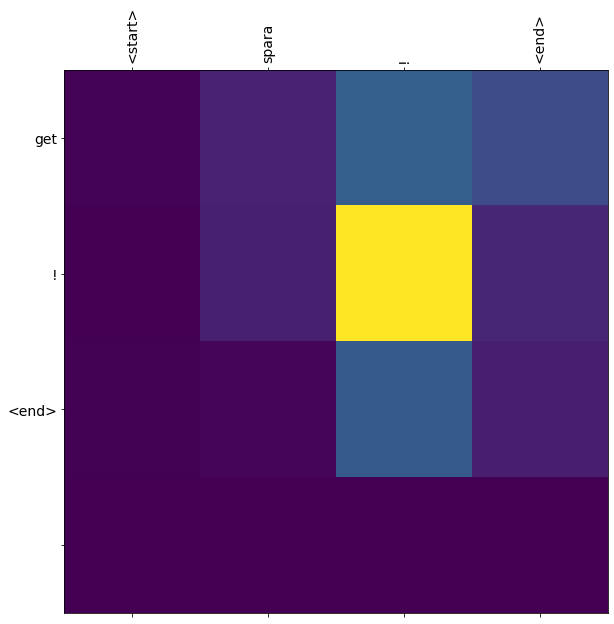

In [ ]:
translate(df[1][50])

Input: <start> tom ha mentito . <end>
Predicted translation: tom lied to lie . <end> 


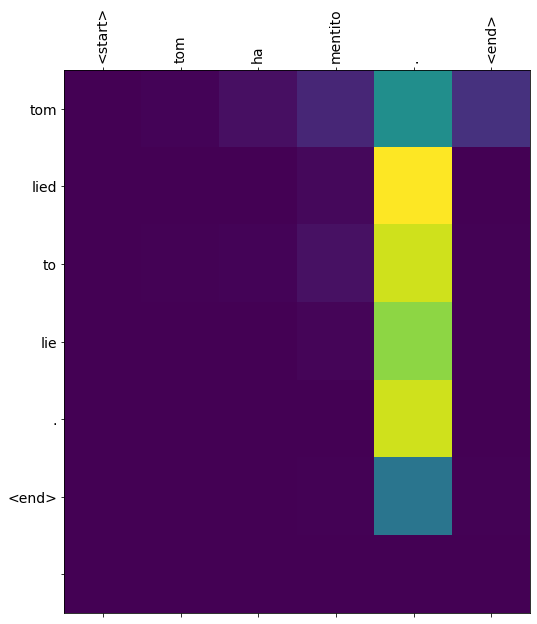

In [ ]:
translate(df[1][1000])

Input: <start> chiamatemi . <end>
Predicted translation: call me . <end> 


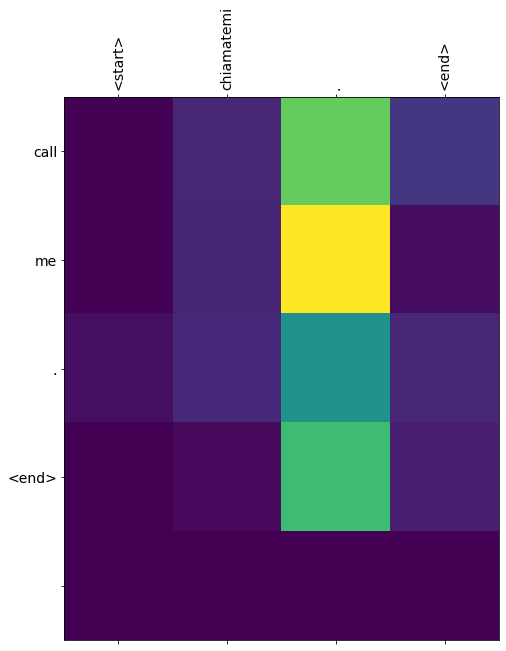

In [ ]:
translate(df[1][200])

## Calculate BLEU score

In [ ]:
def pred_tensor(input_sentence):
  max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

  #attention_plot = np.zeros((max_length_targ, max_length_inp))
  #attention_plot = []

  sentence = preprocess_sentence(input_sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden,cell = tf.zeros((1, 128)),tf.zeros((1, 128))
  enc_out, enc_hidden, enc_cell = encoder(inputs, [hidden,cell])


  dec_hidden, dec_cell = enc_hidden, enc_cell
  #dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 1)
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, dec_cell, _,_ = onestepdecoder(dec_input,enc_out, dec_hidden, dec_cell)
                                                         
    #output,dec_h,dec_c,attention_weights,_=onestepdecoder(input_to_decoder,encoder_output,dec_h,dec_c)

    # storing the attention weights to plot later on
    #attention_weights = tf.reshape(attention_weights, (-1, ))
    #attention_plot.appeend(attention_weights.numpy())
    #attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()
    
    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)
  #attention_plot = np.asarray(attention_plot)
  return result

In [ ]:
import random
import nltk.translate.bleu_score as bleu
import warnings
warnings.filterwarnings("ignore")

def get_bleu(inp_tensor, targ_tensor):
  random_index = random.sample(range(1, 68086), 1000)
  bleu_score = 0
  for index in tqdm(random_index):
    x = input_tensor_val[index]
    y = target_tensor_val[index]
    out=" "
    for i in x:
      if (i!=0 and i!=1 and i!=2):
        out += inp_lang.index_word[i] + ' '
    inp=" "
    for i in y:
      if (i!=0 and i!=1 and i!=2):
        inp += targ_lang.index_word[i] + ' '
    translated = pred_tensor(out)
    translated = translated.split()
    translated[-1] = ''
    translated = ' '.join(translated)
    bleu_score += bleu.sentence_bleu([translated.split(),], inp.split())
  return bleu_score

In [ ]:
get_bleu(input_tensor_val, target_tensor_val)

100%|██████████| 1000/1000 [01:08<00:00, 14.62it/s]


634.0815786012852

## Model-dot Results:

Best loss is achieved at the last epoch having value 0.0970

BLEU score on random 1000 datapoints of test data is 634.08

# Model-General

## Training function

In [32]:
# Implement teacher forcing while training your model. You can do it two ways.
# Prepare your data, encoder_input,decoder_input and decoder_output
# if decoder input is 
# <start> Hi how are you
# decoder output should be
# Hi How are you <end>
# i.e when you have send <start>-- decoder predicted Hi, 'Hi' decoder predicted 'How' .. e.t.c
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes

@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden_h, enc_hidden_c = encoder(inp, enc_hidden)

    dec_hidden_h, dec_hidden_c = enc_hidden_h, enc_hidden_c

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * 128, 1)

    # Teacher forcing - feeding the target as the next input
    for t in tqdm(range(1, targ.shape[1])):
      # passing enc_output to the decoder
      predictions, dec_hidden_h, dec_hidden_c, _, _ = onestepdecoder(dec_input,enc_output, dec_hidden_h, dec_hidden_c)

      loss += custom_lossfunction(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + onestepdecoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

# or
 
# model.fit([train_ita,train_eng],train_eng[:,1:]..)
# Note: If you follow this approach some grader functions might return false and this is fine.

## Loss

In [33]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def custom_lossfunction(targets,logits):
  # Custom loss function that will not consider the loss for padded zeros.
  # Refer https://www.tensorflow.org/tutorials/text/nmt_with_attention#define_the_optimizer_and_the_loss_function same code used
  mask = tf.math.logical_not(tf.math.equal(targets, 0))
  loss_ = loss_object(targets, logits)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

## Initialize

In [34]:
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(len(input_tensor_train))
dataset = dataset.batch(128, drop_remainder=True)
steps_per_epoch = len(input_tensor_train)//128

In [35]:
encoder = Encoder(inp_vocab_size=len(inp_lang.word_index)+1, embedding_size=50, input_length=50, lstm_size=128)  
decoder = Decoder(out_vocab_size=len(targ_lang.word_index)+1, embedding_dim=50, output_length=50, dec_units=128, score_fun='general', att_units=128)
onestepdecoder=OneStepDecoder(len(targ_lang.word_index)+1, 50, 50, 128 ,'general' ,128)

In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Start training

In [38]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 3
import time
checkpoint_dir = './content/gdrive/My Drive/Colab Notebooks/Seq2Seq checkpoiints/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

100%|██████████| 111/111 [00:36<00:00,  3.03it/s]


Epoch 1 Batch 0 Loss 0.6759
Epoch 1 Batch 100 Loss 0.3792
Epoch 1 Batch 200 Loss 0.3508
Epoch 1 Batch 300 Loss 0.3414
Epoch 1 Batch 400 Loss 0.3229
Epoch 1 Batch 500 Loss 0.3216
Epoch 1 Batch 600 Loss 0.3251
Epoch 1 Batch 700 Loss 0.3484
Epoch 1 Batch 800 Loss 0.3296
Epoch 1 Batch 900 Loss 0.3286
Epoch 1 Batch 1000 Loss 0.3203
Epoch 1 Batch 1100 Loss 0.3168
Epoch 1 Batch 1200 Loss 0.3105
Epoch 1 Batch 1300 Loss 0.3219
Epoch 1 Batch 1400 Loss 0.2970
Epoch 1 Batch 1500 Loss 0.2798
Epoch 1 Batch 1600 Loss 0.3041
Epoch 1 Batch 1700 Loss 0.2960
Epoch 1 Batch 1800 Loss 0.3100
Epoch 1 Batch 1900 Loss 0.2838
Epoch 1 Batch 2000 Loss 0.2827
Epoch 1 Batch 2100 Loss 0.2931
Epoch 1 Loss 0.3159
Time taken for epoch 1702.172844171524 sec

Epoch 2 Batch 0 Loss 0.2600
Epoch 2 Batch 100 Loss 0.2827
Epoch 2 Batch 200 Loss 0.2623
Epoch 2 Batch 300 Loss 0.2628
Epoch 2 Batch 400 Loss 0.2668
Epoch 2 Batch 500 Loss 0.2572
Epoch 2 Batch 600 Loss 0.2746
Epoch 2 Batch 700 Loss 0.2578
Epoch 2 Batch 800 Loss 0.271

In [39]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 3
import time
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.2008
Epoch 1 Batch 100 Loss 0.1936
Epoch 1 Batch 200 Loss 0.1936
Epoch 1 Batch 300 Loss 0.1976
Epoch 1 Batch 400 Loss 0.1992
Epoch 1 Batch 500 Loss 0.1854
Epoch 1 Batch 600 Loss 0.2097
Epoch 1 Batch 700 Loss 0.2052
Epoch 1 Batch 800 Loss 0.1754
Epoch 1 Batch 900 Loss 0.1817
Epoch 1 Batch 1000 Loss 0.1767
Epoch 1 Batch 1100 Loss 0.1706
Epoch 1 Batch 1200 Loss 0.1768
Epoch 1 Batch 1300 Loss 0.1766
Epoch 1 Batch 1400 Loss 0.1678
Epoch 1 Batch 1500 Loss 0.1820
Epoch 1 Batch 1600 Loss 0.1766
Epoch 1 Batch 1700 Loss 0.1829
Epoch 1 Batch 1800 Loss 0.1829
Epoch 1 Batch 1900 Loss 0.1964
Epoch 1 Batch 2000 Loss 0.1740
Epoch 1 Batch 2100 Loss 0.2129
Epoch 1 Loss 0.1882
Time taken for epoch 1540.240258216858 sec

Epoch 2 Batch 0 Loss 0.2104
Epoch 2 Batch 100 Loss 0.1835
Epoch 2 Batch 200 Loss 0.1828
Epoch 2 Batch 300 Loss 0.1800
Epoch 2 Batch 400 Loss 0.1758
Epoch 2 Batch 500 Loss 0.1725
Epoch 2 Batch 600 Loss 0.1714
Epoch 2 Batch 700 Loss 0.1684
Epoch 2 Batch 800 Loss 0.141

In [40]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 1
import time
checkpoint_dir = '.extra/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.1282
Epoch 1 Batch 100 Loss 0.1838
Epoch 1 Batch 200 Loss 0.1353
Epoch 1 Batch 300 Loss 0.1247
Epoch 1 Batch 400 Loss 0.1397
Epoch 1 Batch 500 Loss 0.1413
Epoch 1 Batch 600 Loss 0.1396
Epoch 1 Batch 700 Loss 0.1272
Epoch 1 Batch 800 Loss 0.1314
Epoch 1 Batch 900 Loss 0.1326
Epoch 1 Batch 1000 Loss 0.1248
Epoch 1 Batch 1100 Loss 0.1313
Epoch 1 Batch 1200 Loss 0.1210
Epoch 1 Batch 1300 Loss 0.1308
Epoch 1 Batch 1400 Loss 0.1314
Epoch 1 Batch 1500 Loss 0.1572
Epoch 1 Batch 1600 Loss 0.1522
Epoch 1 Batch 1700 Loss 0.1369
Epoch 1 Batch 1800 Loss 0.1190
Epoch 1 Batch 1900 Loss 0.1224
Epoch 1 Batch 2000 Loss 0.1276
Epoch 1 Batch 2100 Loss 0.1383
Epoch 1 Loss 0.1356
Time taken for epoch 1540.0749011039734 sec

Epoch 1 Batch 0 Loss 0.1282
Epoch 1 Batch 100 Loss 0.1838
Epoch 1 Batch 200 Loss 0.1353
Epoch 1 Batch 300 Loss 0.1247
Epoch 1 Batch 400 Loss 0.1397
Epoch 1 Batch 500 Loss 0.1413
Epoch 1 Batch 600 Loss 0.1396
Epoch 1 Batch 700 Loss 0.1272
Epoch 1 Batch 800 Loss 0.13

In [43]:
checkpoint.restore(tf.train.latest_checkpoint('.extra/training_checkpoints'))

## Model summary

Model is trained for 7 epochs.

Optimizer used is Adam with varying learning rate mentioned below.

  *   First 6 epochs on default learning rate 0.01.
  *   Next 1 epoch on a slower learning rate 0.001.

Batch size used is 128.

Embed size = Input length = Output length = 50

Decoder units = Lstm units = Attention units = 128

## Prediction

In [44]:
def plot_attention(attention, sentence, predicted_sentence):
  #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate code taken from same

  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [45]:
def predict(input_sentence):
  #https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate taken from here with minor changes
  '''
  A. Given input sentence, convert the sentence into integers using tokenizer used earlier
  B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
  C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
  D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
  E. Call plot_attention(#params)
  F. Return the predicted sentence
  '''
  max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

  attention_plot = np.zeros((max_length_targ, max_length_inp))
  #attention_plot = []

  sentence = preprocess_sentence(input_sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden,cell = tf.zeros((1, 128)),tf.zeros((1, 128))
  enc_out, enc_hidden, enc_cell = encoder(inputs, [hidden,cell])


  dec_hidden, dec_cell = enc_hidden, enc_cell
  #dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 1)
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, dec_cell, attention_weights,_ = onestepdecoder(dec_input,enc_out, dec_hidden, dec_cell)
                                                         
    #output,dec_h,dec_c,attention_weights,_=onestepdecoder(input_to_decoder,encoder_output,dec_h,dec_c)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    #attention_plot.appeend(attention_weights.numpy())
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)
  #attention_plot = np.asarray(attention_plot)
  return result, sentence, attention_plot

In [46]:
def translate(sentence):
  result, sentence, attention= predict(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Input: <start> ciao ! <end>
Predicted translation: hello ! <end> 


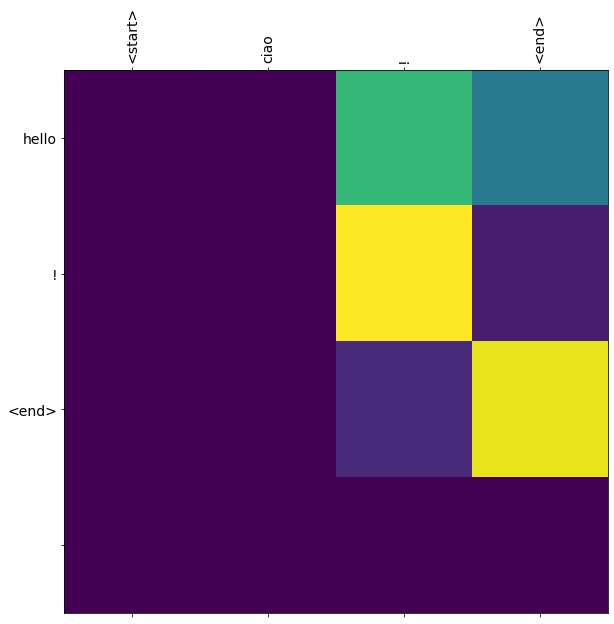

In [48]:
translate(df[1][0])

Input: <start> chiamatemi . <end>
Predicted translation: call me . <end> 


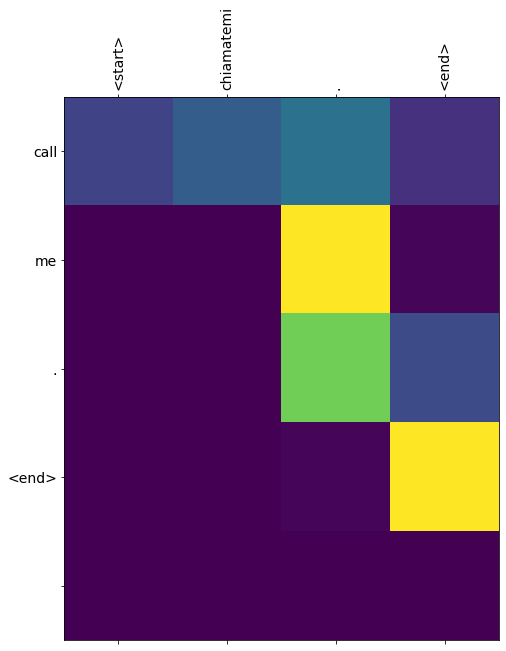

In [50]:
translate(df[1][200])

Input: <start> io sono caduta . <end>
Predicted translation: i fell . <end> 


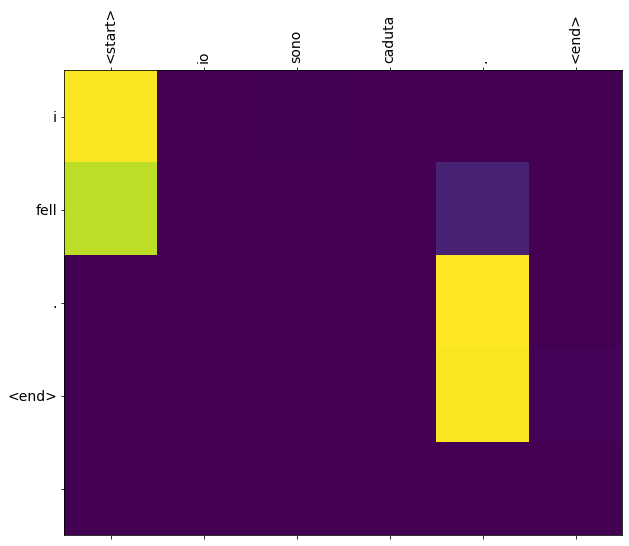

In [52]:
translate(df[1][99])

## BLEU score

In [53]:
def pred_tensor(input_sentence):
  max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

  #attention_plot = np.zeros((max_length_targ, max_length_inp))
  #attention_plot = []

  sentence = preprocess_sentence(input_sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden,cell = tf.zeros((1, 128)),tf.zeros((1, 128))
  enc_out, enc_hidden, enc_cell = encoder(inputs, [hidden,cell])


  dec_hidden, dec_cell = enc_hidden, enc_cell
  #dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 1)
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, dec_cell, _,_ = onestepdecoder(dec_input,enc_out, dec_hidden, dec_cell)
                                                         
    #output,dec_h,dec_c,attention_weights,_=onestepdecoder(input_to_decoder,encoder_output,dec_h,dec_c)

    # storing the attention weights to plot later on
    #attention_weights = tf.reshape(attention_weights, (-1, ))
    #attention_plot.appeend(attention_weights.numpy())
    #attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()
    
    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)
  #attention_plot = np.asarray(attention_plot)
  return result

In [55]:
import random
import nltk.translate.bleu_score as bleu
import warnings
warnings.filterwarnings("ignore")

def get_bleu(inp_tensor, targ_tensor):
  random_index = random.sample(range(1, 68086), 1000)
  bleu_score = 0
  for index in tqdm(random_index):
    x = input_tensor_val[index]
    y = target_tensor_val[index]
    out=" "
    for i in x:
      if (i!=0 and i!=1 and i!=2):
        out += inp_lang.index_word[i] + ' '
    inp=" "
    for i in y:
      if (i!=0 and i!=1 and i!=2):
        inp += targ_lang.index_word[i] + ' '
    translated = pred_tensor(out)
    translated = translated.split()
    translated[-1] = ''
    translated = ' '.join(translated)
    bleu_score += bleu.sentence_bleu([translated.split(),], inp.split())
  return bleu_score

In [56]:
get_bleu(input_tensor_val, target_tensor_val)

100%|██████████| 1000/1000 [01:19<00:00, 12.51it/s]


628.3770478920059

## Model results

Best loss is achieved at the last epoch having value 0.1356

BLEU score on random 1000 datapoints of test data is 628.38

# Concat scoring function

## Train function

In [66]:
# Implement teacher forcing while training your model. You can do it two ways.
# Prepare your data, encoder_input,decoder_input and decoder_output
# if decoder input is 
# <start> Hi how are you
# decoder output should be
# Hi How are you <end>
# i.e when you have send <start>-- decoder predicted Hi, 'Hi' decoder predicted 'How' .. e.t.c
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes

@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden_h, enc_hidden_c = encoder(inp, enc_hidden)

    dec_hidden_h, dec_hidden_c = enc_hidden_h, enc_hidden_c

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * 128, 1)

    # Teacher forcing - feeding the target as the next input
    for t in tqdm(range(1, targ.shape[1])):
      # passing enc_output to the decoder
      predictions, dec_hidden_h, dec_hidden_c, _, _ = onestepdecoder(dec_input,enc_output, dec_hidden_h, dec_hidden_c)

      loss += custom_lossfunction(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + onestepdecoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

# or
 
# model.fit([train_ita,train_eng],train_eng[:,1:]..)
# Note: If you follow this approach some grader functions might return false and this is fine.

## Loss

In [67]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def custom_lossfunction(targets,logits):
  # Custom loss function that will not consider the loss for padded zeros.
  # Refer https://www.tensorflow.org/tutorials/text/nmt_with_attention#define_the_optimizer_and_the_loss_function same code used
  mask = tf.math.logical_not(tf.math.equal(targets, 0))
  loss_ = loss_object(targets, logits)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

## Initialization

In [68]:
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(len(input_tensor_train))
dataset = dataset.batch(128, drop_remainder=True)
steps_per_epoch = len(input_tensor_train)//128

In [69]:
encoder = Encoder(inp_vocab_size=len(inp_lang.word_index)+1, embedding_size=50, input_length=50, lstm_size=128)  
decoder = Decoder(out_vocab_size=len(targ_lang.word_index)+1, embedding_dim=50, output_length=50, dec_units=128, score_fun='concat', att_units=128)
onestepdecoder=OneStepDecoder(len(targ_lang.word_index)+1, 50, 50, 128 ,'concat' ,128)

## Training

In [70]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 3
import time
checkpoint_dir = './content/gdrive/My Drive/Colab Notebooks/Seq2Seq checkpoiints/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

100%|██████████| 111/111 [00:40<00:00,  2.75it/s]


Epoch 1 Batch 0 Loss 0.6878
Epoch 1 Batch 100 Loss 0.3326
Epoch 1 Batch 200 Loss 0.3363
Epoch 1 Batch 300 Loss 0.3257
Epoch 1 Batch 400 Loss 0.2916
Epoch 1 Batch 500 Loss 0.2902
Epoch 1 Batch 600 Loss 0.2914
Epoch 1 Batch 700 Loss 0.2792
Epoch 1 Batch 800 Loss 0.2681
Epoch 1 Batch 900 Loss 0.2714
Epoch 1 Batch 1000 Loss 0.2536
Epoch 1 Batch 1100 Loss 0.2517
Epoch 1 Batch 1200 Loss 0.2521
Epoch 1 Batch 1300 Loss 0.2304
Epoch 1 Batch 1400 Loss 0.2442
Epoch 1 Batch 1500 Loss 0.2290
Epoch 1 Batch 1600 Loss 0.2368
Epoch 1 Batch 1700 Loss 0.2338
Epoch 1 Batch 1800 Loss 0.2223
Epoch 1 Batch 1900 Loss 0.2160
Epoch 1 Batch 2000 Loss 0.2152
Epoch 1 Batch 2100 Loss 0.2104
Epoch 1 Loss 0.2698
Time taken for epoch 1998.3184669017792 sec

Epoch 2 Batch 0 Loss 0.2149
Epoch 2 Batch 100 Loss 0.1985
Epoch 2 Batch 200 Loss 0.2008
Epoch 2 Batch 300 Loss 0.1917
Epoch 2 Batch 400 Loss 0.1899
Epoch 2 Batch 500 Loss 0.1867
Epoch 2 Batch 600 Loss 0.1874
Epoch 2 Batch 700 Loss 0.2209
Epoch 2 Batch 800 Loss 0.18

In [72]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 1
import time
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.1111
Epoch 1 Batch 100 Loss 0.0966
Epoch 1 Batch 200 Loss 0.1109
Epoch 1 Batch 300 Loss 0.1079
Epoch 1 Batch 400 Loss 0.0968
Epoch 1 Batch 500 Loss 0.1057
Epoch 1 Batch 600 Loss 0.1134
Epoch 1 Batch 700 Loss 0.1007
Epoch 1 Batch 800 Loss 0.1013
Epoch 1 Batch 900 Loss 0.0919
Epoch 1 Batch 1000 Loss 0.0956
Epoch 1 Batch 1100 Loss 0.0991
Epoch 1 Batch 1200 Loss 0.1069
Epoch 1 Batch 1300 Loss 0.0910
Epoch 1 Batch 1400 Loss 0.0859
Epoch 1 Batch 1500 Loss 0.0849
Epoch 1 Batch 1600 Loss 0.0846
Epoch 1 Batch 1700 Loss 0.0910
Epoch 1 Batch 1800 Loss 0.0888
Epoch 1 Batch 1900 Loss 0.0825
Epoch 1 Batch 2000 Loss 0.0855
Epoch 1 Batch 2100 Loss 0.0741
Epoch 1 Loss 0.0967
Time taken for epoch 1824.6811904907227 sec



In [73]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 1
import time
checkpoint_dir = '.extra/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.0771
Epoch 1 Batch 100 Loss 0.0785
Epoch 1 Batch 200 Loss 0.0880
Epoch 1 Batch 400 Loss 0.0756
Epoch 1 Batch 500 Loss 0.0767
Epoch 1 Batch 600 Loss 0.0704
Epoch 1 Batch 700 Loss 0.0763
Epoch 1 Batch 800 Loss 0.0759
Epoch 1 Batch 900 Loss 0.0702
Epoch 1 Batch 1000 Loss 0.0684
Epoch 1 Batch 1100 Loss 0.0786
Epoch 1 Batch 1200 Loss 0.0616
Epoch 1 Batch 1300 Loss 0.0754
Epoch 1 Batch 1400 Loss 0.0589
Epoch 1 Batch 1500 Loss 0.0683
Epoch 1 Batch 1600 Loss 0.0609
Epoch 1 Batch 1700 Loss 0.0801
Epoch 1 Batch 1800 Loss 0.0639
Epoch 1 Batch 1900 Loss 0.0744
Epoch 1 Batch 2000 Loss 0.0575
Epoch 1 Batch 2100 Loss 0.0715
Epoch 1 Loss 0.0710
Time taken for epoch 1824.4262850284576 sec



In [74]:
# from https://www.tensorflow.org/tutorials/text/nmt_with_attention#training with minor changes
EPOCHS = 1
import time
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=onestepdecoder)

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_states(batch_size=128)
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.0602
Epoch 1 Batch 100 Loss 0.0586
Epoch 1 Batch 200 Loss 0.0664
Epoch 1 Batch 300 Loss 0.0623
Epoch 1 Batch 400 Loss 0.0612
Epoch 1 Batch 500 Loss 0.0619
Epoch 1 Batch 600 Loss 0.0683
Epoch 1 Batch 700 Loss 0.0634
Epoch 1 Batch 800 Loss 0.0591
Epoch 1 Batch 900 Loss 0.0553
Epoch 1 Batch 1000 Loss 0.0589
Epoch 1 Batch 1100 Loss 0.0512
Epoch 1 Batch 1200 Loss 0.0613
Epoch 1 Batch 1300 Loss 0.0509
Epoch 1 Batch 1400 Loss 0.0542
Epoch 1 Batch 1500 Loss 0.0509
Epoch 1 Batch 1600 Loss 0.0497
Epoch 1 Batch 1700 Loss 0.0703
Epoch 1 Batch 1800 Loss 0.0455
Epoch 1 Batch 1900 Loss 0.0533
Epoch 1 Batch 2000 Loss 0.0521
Epoch 1 Batch 2100 Loss 0.0486
Epoch 1 Loss 0.0545
Time taken for epoch 1828.3004620075226 sec



## Model summary

Model is trained for 6 epochs.

Optimizer used is Adam with constant learning rate mentioned below.

  *   First 6 epochs on default learning rate 0.01.

Batch size used is 128.

Embed size = Input length = Output length = 50

Decoder units = Lstm units = Attention units = 128

## Predictions

In [76]:
def plot_attention(attention, sentence, predicted_sentence):
  #Refer: https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate code taken from same

  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [77]:
def predict(input_sentence):
  #https://www.tensorflow.org/tutorials/text/nmt_with_attention#translate taken from here with minor changes
  '''
  A. Given input sentence, convert the sentence into integers using tokenizer used earlier
  B. Pass the input_sequence to encoder. we get encoder_outputs, last time step hidden and cell state
  C. Initialize index of <start> as input to decoder. and encoder final states as input_states to onestepdecoder.
  D. till we reach max_length of decoder or till the model predicted word <end>:
         predictions, input_states, attention_weights = model.layers[1].onestepdecoder(input_to_decoder, encoder_output, input_states)
         Save the attention weights
         And get the word using the tokenizer(word index) and then store it in a string.
  E. Call plot_attention(#params)
  F. Return the predicted sentence
  '''
  max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

  attention_plot = np.zeros((max_length_targ, max_length_inp))
  #attention_plot = []

  sentence = preprocess_sentence(input_sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden,cell = tf.zeros((1, 128)),tf.zeros((1, 128))
  enc_out, enc_hidden, enc_cell = encoder(inputs, [hidden,cell])


  dec_hidden, dec_cell = enc_hidden, enc_cell
  #dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 1)
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, dec_cell, attention_weights,_ = onestepdecoder(dec_input,enc_out, dec_hidden, dec_cell)
                                                         
    #output,dec_h,dec_c,attention_weights,_=onestepdecoder(input_to_decoder,encoder_output,dec_h,dec_c)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    #attention_plot.appeend(attention_weights.numpy())
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)
  #attention_plot = np.asarray(attention_plot)
  return result, sentence, attention_plot

In [78]:
def translate(sentence):
  result, sentence, attention= predict(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [79]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Input: <start> ciao ! <end>
Predicted translation: hello ! <end> 


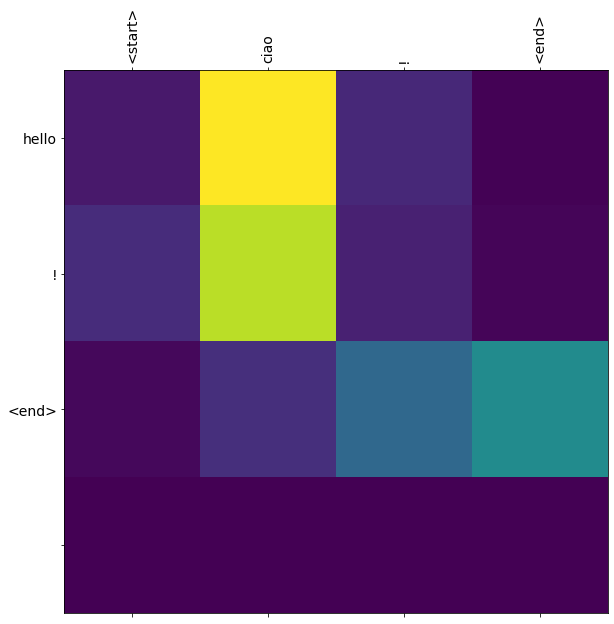

In [81]:
translate(df[1][0])

Input: <start> io sono caduta . <end>
Predicted translation: i fell . <end> 


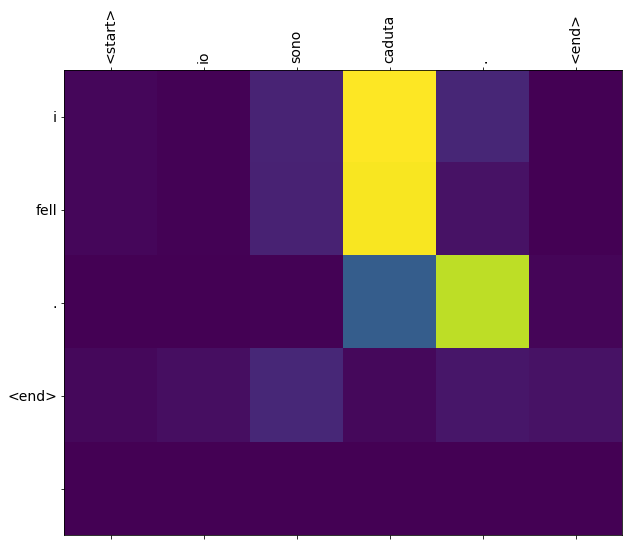

In [82]:
translate(df[1][99])

Input: <start> tom ha mentito . <end>
Predicted translation: tom lied . <end> 


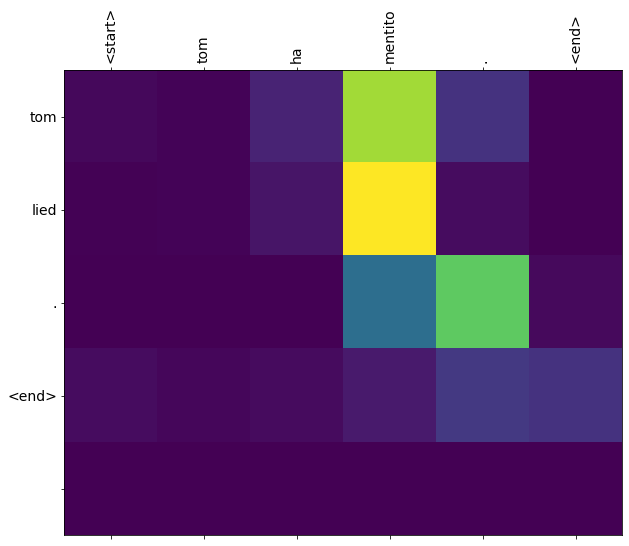

In [86]:
translate(df[1][1000])

## BLEU score

In [87]:
def pred_tensor(input_sentence):
  max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

  #attention_plot = np.zeros((max_length_targ, max_length_inp))
  #attention_plot = []

  sentence = preprocess_sentence(input_sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden,cell = tf.zeros((1, 128)),tf.zeros((1, 128))
  enc_out, enc_hidden, enc_cell = encoder(inputs, [hidden,cell])


  dec_hidden, dec_cell = enc_hidden, enc_cell
  #dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 1)
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, dec_cell, _,_ = onestepdecoder(dec_input,enc_out, dec_hidden, dec_cell)
                                                         
    #output,dec_h,dec_c,attention_weights,_=onestepdecoder(input_to_decoder,encoder_output,dec_h,dec_c)

    # storing the attention weights to plot later on
    #attention_weights = tf.reshape(attention_weights, (-1, ))
    #attention_plot.appeend(attention_weights.numpy())
    #attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()
    
    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)
  #attention_plot = np.asarray(attention_plot)
  return result

In [88]:
import random
import nltk.translate.bleu_score as bleu
import warnings
warnings.filterwarnings("ignore")

def get_bleu(inp_tensor, targ_tensor):
  random_index = random.sample(range(1, 68086), 1000)
  bleu_score = 0
  for index in tqdm(random_index):
    x = input_tensor_val[index]
    y = target_tensor_val[index]
    out=" "
    for i in x:
      if (i!=0 and i!=1 and i!=2):
        out += inp_lang.index_word[i] + ' '
    inp=" "
    for i in y:
      if (i!=0 and i!=1 and i!=2):
        inp += targ_lang.index_word[i] + ' '
    translated = pred_tensor(out)
    translated = translated.split()
    translated[-1] = ''
    translated = ' '.join(translated)
    bleu_score += bleu.sentence_bleu([translated.split(),], inp.split())
  return bleu_score

In [94]:
get_bleu(input_tensor_val, target_tensor_val)

100%|██████████| 1000/1000 [01:49<00:00,  9.13it/s]


718.5695864681999

## Model Results

Best loss is achieved at the last epoch having value 0.0545

BLEU score on random 1000 datapoints of test data is 718.57